In [26]:
import numpy as np
from numpy import sin, cos
from sympy.matrices import *
from sympy import Matrix
import matplotlib.pyplot as plt
from sympy.vector.vector import Vector, BaseVector
from sympy.vector.coordsysrect import CoordSysCartesian
#from sympy.plotting import plot
from sympy import symbols
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations


Function maps X to Y
$$f: X->Y$$
$$f: R^2 -> R^3$$
$$f: R^2 -> R$$
$$f(x_1,x_2) -> R^3 = f(x_1,x_2) -> f(x_1+x_2,x_1-x_2,x_1x_2)$$
Real World Execution: Taking a 3D structure and viewing it as a 2D picture. A 64 bit gaming system would be an example. Theres a 3D environment on a 2D screen

Example: $$f(x_1,x_2,x_3) -> R^2 = f(x_1,x_2) -> f(x_1+2x_2,3x_3)$$
\begin{matrix}
f
\begin{bmatrix}
1\\
1\\
1\\
\end{bmatrix}
=
\begin{bmatrix}
3\\
3\\
\end{bmatrix}
\end{matrix}

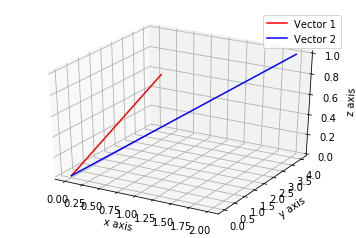

In [5]:
v1 = np.array([1,1,1])
v2 = np.array([2,4,1])

fig1 = plt.figure()
ax2 = fig1.add_subplot(111, projection='3d')

ax2.plot([0,v1[0]],[0,v1[1]],[0,v1[2]], color = 'r', label = 'Vector 1')
ax2.plot([0,v2[0]],[0,v2[1]],[0,v2[2]], color = 'b', label = 'Vector 2')

ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
ax2.set_zlabel('z axis')
plt.legend()
plt.show()

transformed to $R^2$

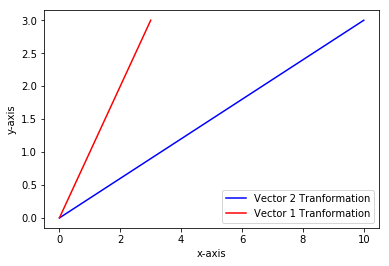

In [6]:
C = CoordSysCartesian('C')
i,j,k = C.base_vectors()#i,j,k are for the x,y,z axis
v1 = 3*i + 3*j#specifies coordinates  of (9,0,0)
v2 = 10*i + 3*j
v11 = v1.to_matrix(C)
v22 = v2.to_matrix(C)
plt.plot([0,v22[0]],[0,v22[1]], color='b', label= 'Vector 2 Tranformation')
plt.plot([0,v11[0]],[0,v11[1]], color='r', label= 'Vector 1 Tranformation')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

## Linear Transformation

T: $R^n->R^m$ where $\bar a, \bar b$ are members of $R^n$

Linear Transformation if and only if:

1)$T(\bar a + \bar b) = T(\bar a) + T (\bar b)$

2)$T(c\bar a) = cT(\bar a)$




## Matrix Vector Products as Linear Transformations

\begin{matrix}
A = 
\begin{bmatrix}
    \\
    v_1 & v_2 & v_3 \dots v_n\\
    \\
\end{bmatrix}
\begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots\\
    x_{n}\\
\end{bmatrix}
=
\begin{pmatrix}
    x_1v_1+x_2v_2+x_3v_3+\dots +x_nv_n=0\\
\end{pmatrix}
\end{matrix}

$$T:R^n->R^m$$
$$T(\bar x) = A\bar x$$

$v_1,v_2,v_3 \dots v_n$ are members of $R^m$

Matrix product with vectors is always a linear transformation

gpu processes are matrix multiplications

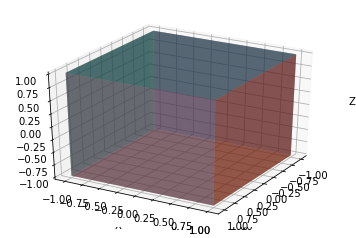

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
ax.plot_surface(X,Y,1, alpha=0.5)
ax.plot_surface(X,Y,-1, alpha=0.5)
ax.plot_surface(X,-1,Y, alpha=0.5)
ax.plot_surface(X,1,Y, alpha=0.5)
ax.plot_surface(1,X,Y, alpha=0.5)
ax.plot_surface(-1,X,Y, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X,Y,1, alpha=0.5)
ax1.plot_surface(X,Y,-1, alpha=0.5)
ax1.plot_surface(X,-1,Y, alpha=0.5)
ax1.plot_surface(X,1,Y, alpha=0.5)
ax1.plot_surface(1,X,Y, alpha=0.5)
ax1.plot_surface(-1,X,Y, alpha=0.5)
ax1.view_init(azim=30)
plt.show()

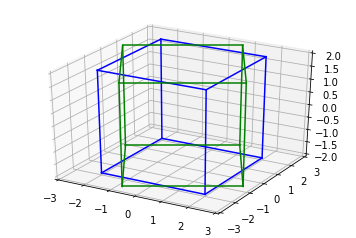

An example of transformation from R3 to R3


In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("auto")
ax.set_autoscale_on(True)

r = [-2, 2]
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e), color="b")

d = [-2, 2]
theta = np.radians(30)

for s, e in combinations(np.array(list(product(d,d,d))), 2):
    if np.sum(np.abs(s-e)) == d[1]-d[0]:
        s_rotated = [s[0] * cos(theta) - s[1] * sin(theta), 
                     s[0] * sin(theta) + s[1] * cos(theta),
                     s[2]]
        e_rotated = [e[0] * cos(theta) - e[1] * sin(theta), 
                     e[0] * sin(theta) + e[1] * cos(theta),
                     e[2]]      
        ax.plot3D(*zip(s_rotated,e_rotated), color="g")

plt.show()
print('An example of transformation from R3 to R3')

Identity Matrix
\begin{matrix}
I_n =
\begin{bmatrix}
1&0&0&\dots &0\\
0&1&0&\dots &0\\
0&0&1&\dots &0\\
\vdots &\vdots &\vdots &\dots &\vdots \\
0&0&0&\dots & 1
\end{bmatrix}
= 
\begin{bmatrix}
e_1&
e_2&
e_3&
e_n
\end{bmatrix}
-> Standard basis for R^n
\end{matrix}

\begin{matrix}
I_n\bar x=
\begin{bmatrix}
1&0&0&\dots &0\\
0&1&0&\dots &0\\
0&0&1&\dots &0\\
\vdots &\vdots &\vdots &\dots &\vdots \\
0&0&0&\dots & 1
\end{bmatrix} 
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\vdots \\
x_n
\end{bmatrix}
=
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\vdots \\
x_n
\end{bmatrix}
\end{matrix}
$$\bar x = x_1\bar e_1+x_2\bar e_2+x_3\bar e_3+\dots +x_n\bar e_n$$
$$T(\bar x) = T(x_1\bar e_1+x_2\bar e_2+x_3\bar e_3+\dots +x_n\bar e_n)$$
$$T(\bar x) = x_1T(\bar e_1)+x_2T(\bar e_2)+x_3T(\bar e_3)+\dots +x_nT(\bar e_n)$$

\begin{matrix}
T(x) =
= 
\begin{bmatrix}
e_1&
e_2&
e_3&
e_n
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\vdots \\
x_n
\end{bmatrix}
\end{matrix}
All linear transformations can be a matrix vector product

What happens when you apply the follwing transformation A to the vectors?
\begin{matrix}
T(x) = 
\begin{bmatrix}
1&-1\\
2&0\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}
\end{matrix}
1)x0
\begin{bmatrix}
-2\\
-2\\
\end{bmatrix}
2)x1
\begin{bmatrix}
-2\\
2\\
\end{bmatrix}
3)x2
\begin{bmatrix}
2\\
-2\\
\end{bmatrix}
4)L_0
\begin{pmatrix}
x_0+t(x_1-x_0)|0<=t<=1)
\end{pmatrix}
5)
L_1
\begin{pmatrix}
x_1+t(x_2-x_1)|0<=t<=1)
\end{pmatrix}
6)
L_2
\begin{pmatrix}
x_2+t(x_0-x_2)|0<=t<=1)
\end{pmatrix}

Let's plot the vectors:

Before applying the transformation Matrix


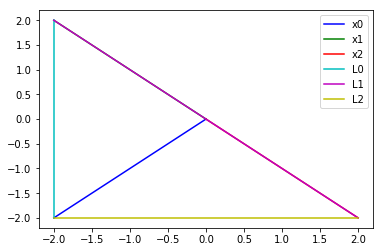

In [121]:
x0 = np.array([-2,-2])
x1 = np.array([-2,2])
x2 =np.array([2,-2])
L0 =x0+(x1-x0)
L1 =x1+(x2-x1)
L2 =x2+(x0-x2)
v1 = np.array([[x0],[x1],[x2],[L0],[L1],[L2]])
colors = ['b','g','r','c','m','y','k']
legends = ['x0','x1','x2','L0','L1','L2']
for i in range(3):
    plt.plot([0,v1[i][0][0]],[0,v1[i][0][1]],color=colors[i], label = legends[i])
#i+3 starts with the array L0
#v1[1] = [[-2,2]]; v1[1][0] = [-2,2]; v1[1][0][0] = -2
for i in range(3):
    plt.plot([v1[i][0][0],v1[i+3][0][0]],[v1[i][0][1],v1[i+3][0][1]],color=colors[i+3], label = legends[i+3])
plt.legend()
print('Before applying the transformation Matrix')
plt.show()

1)
\begin{matrix}
T(x) = 
\begin{bmatrix}
1&-1\\
2&0\\
\end{bmatrix}
\begin{bmatrix}
-2\\
-2\\
\end{bmatrix}
=
\begin{bmatrix}
0\\
-4\\
\end{bmatrix}
\end{matrix}
2)
\begin{matrix}
T(x) = 
\begin{bmatrix}
1&-1\\
2&0\\
\end{bmatrix}
\begin{bmatrix}
-2\\
2\\
\end{bmatrix}
=
\begin{bmatrix}
-4\\
-4\\
\end{bmatrix}
\end{matrix}
3)
\begin{matrix}
T(x) = 
\begin{bmatrix}
1&-1\\
2&0\\
\end{bmatrix}
\begin{bmatrix}
2\\
-2\\
\end{bmatrix}
=
\begin{bmatrix}
4\\
4\\
\end{bmatrix}
\end{matrix}
4)
\begin{matrix}
T(x) = 
\begin{bmatrix}
1&-1\\
2&0\\
\end{bmatrix}
\begin{bmatrix}
0\\
4\\
\end{bmatrix}
=
\begin{bmatrix}
-1\\
0\\
\end{bmatrix}
\end{matrix}

## Image of a subset under a transformation

$T:R^n->R^m$

$T(v): image of V under T$


After applying the transformation Matrix


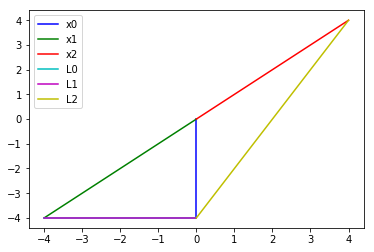

In [122]:
x0 = np.array([-2,-2])
x1 = np.array([-2,2])
x2 =np.array([2,-2])
L0 =x0+(x1-x0)
L1 =x1+(x2-x1)
L2 =x2+(x0-x2)
T = Matrix([[1,-1],[2,0]])
v1= np.array([[T*x0],[T*x1],[T*x2],[T*L0],[T*L2],[T*L2]])
colors = ['b','g','r','c','m','y','k']
legends = ['x0','x1','x2','L0','L1','L2']
for i in range(3):
    plt.plot([0,v1[i][0][0]],[0,v1[i][0][1]],color=colors[i], label = legends[i])
    
for i in range(3):
    plt.plot([v1[i][0][0],v1[i+3][0][0]],[v1[i][0][1],v1[i+3][0][1]],color=colors[i+3], label = legends[i+3])
plt.legend()
print('After applying the transformation Matrix')
plt.show()